In [22]:
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit.result import marginal_counts
import matplotlib.pyplot as plt

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

The famous (Young's) Double-Slit Experiment demonstrates the **wave-particle duality** of light, as well as **single-particle interference.** 
1. In the case that electrons/photons are fired one at a time, they behave as **particles** and accumulate on the screen as if they were bullets. This produces two characteristic maxima at the **horizontal positions** of the slits.
2. When the electrons/photons are fired in a continuous stream, they behave as **waves** and produce an interference pattern consisting of a series of alternating maxima and minima, which are the result of interference of electrons/photons with **themselves.**

The caveat is that if the stream of electrons/photons are **observed,** they behave as particles and the interference pattern disappears. This phenomenon is called the **observer effect,** analogus to *Copenhagen's Interpretation* which explains wavefunction collapse upon measurement. Let's implement this experiment using Qiskit:

# Case 1 - Without Observation/Detector:

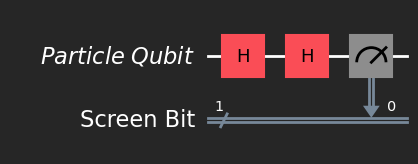

In [23]:
qr_1  = QuantumRegister(1, 'Particle Qubit')
cr_1 = ClassicalRegister(1, 'Screen Bit')

qc_1 = QuantumCircuit(qr_1, cr_1)
qc_1.h(0)
qc_1.h(0)
qc_1.measure(0, 0)

qc_1.draw('mpl', style = 'iqx-dark')

This creates a qubit for the particle fired initalized to $\ket{0}$ and we apply one Hadamard Gate to create a superposition $\ket{+}$ to represent its wave nature, and another Hadamard Gate to combine the paths that it could possibly take. The qubit is the measured. These Hadamard Gates repesent **beamsplitters** in the experiment.

In [24]:
backend = AerSimulator()
result = backend.run(qc_1).result()
counts = result.get_counts(qc_1)

print(counts)

{'0': 1024}


This result tells us that the qubit collapses to a single state, a sign of successful interference.

# Case 2 - With Observation/Detector:

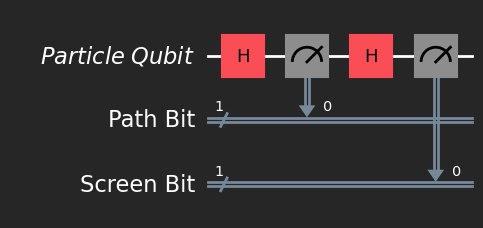

In [25]:
cr_2 = ClassicalRegister(1, 'Path Bit')

qc_2 = QuantumCircuit(qr_1, cr_2, cr_1)
qc_2.h(0)
qc_2.measure(0, 0)

qc_2.h(0)
qc_2.measure(0, 1)

qc_2.draw('mpl', style = 'iqx-dark')

This quantm circuit puts into perspective the case that the stream of particles is observed beforehand. Let's test the results:

In [26]:
result = backend.run(qc_2).result()
marginal_result = marginal_counts(result.get_counts(qc_2), indices = [1])
print(marginal_result)

{'0': 508, '1': 516}


Here we see, in this case we get a 50-50 chance of the qubit collapsing to either $\ket{0}$ or $\ket{1}$, which is a sign of the wavefunction collapse upon measurement.

# Case 3 - Modelling the Detector as a Quantum system:

Here, we add an additional qubit for the detector itself, and to the particle qubit, a preliminary Hadamard Gate as usual then a CNOT Gate to entangle it with the detector's state, and another Hadamard Gate for the path it chooses.

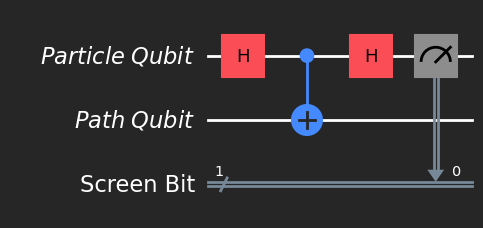

In [27]:
qr_2 = QuantumRegister(1, 'Path Qubit')

qc_3 = QuantumCircuit(qr_1, qr_2, cr_1)
qc_3.h(0)
qc_3.cx(0, 1)
qc_3.h(0)
qc_3.measure(0, 0)

qc_3.draw('mpl', style = 'iqx-dark')   

If the qubit's in the state $\ket{0}$, the detector is then in the state $\ket{0}$, and if the qubit's in the state $\ket{1}$, the detector is then in the state $\ket{1}$.

In [28]:
result = backend.run(qc_3).result()
counts = result.get_counts(qc_3)
print(counts)

{'1': 485, '0': 539}


Hence, entangling the particle with the detector has the **same** effect as observing the particle, a sign of wavefunction collapse upon measurement.

### Subcase: CZ Gate instead of CNOT Gate:

If we replace the CNOT Gate in Case 3 with a nonentangling operation like the CZ Gate...

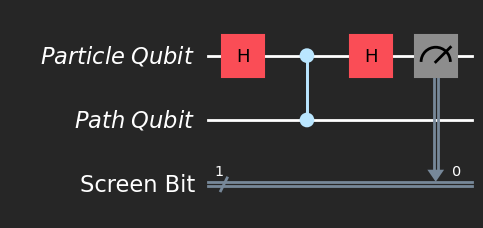

In [29]:
qc_4 = QuantumCircuit(qr_1, qr_2, cr_1)
qc_4.h(0)
qc_4.cz(0, 1)
qc_4.h(0)
qc_4.measure(0, 0)

qc_4.draw('mpl', style = 'iqx-dark')

In [30]:
result = backend.run(qc_4).result()       
counts = result.get_counts(qc_4)
print(counts)

{'0': 1024}


If we use a nonentangling operation, we only get $\ket{0}$ as a possible outcome, a sign of successful interference.